In [0]:
# Simuated anealing algorithm for eight queens problem example
# 
# the code from here - https://github.com/rwsh/AI-Queen
# 

import random as rnd
import numpy as np
import matplotlib.pyplot as plt


class TPole():
    def __init__(self, N):
        self.N = N
        self.Pos = list()
        for n in range(self.N):
            self.Pos.append(n)
            
    def Mix(self):
        Pos = list()
        for p in self.Pos:
            Pos.append(p)
            
        i = 0
        j = 0
        while i == j:
            i = rnd.randint(0, self.N - 1)
            j = rnd.randint(0, self.N - 1)
            
        a = Pos[i]
        Pos[i] = Pos[j]
        Pos[j] = a
    
        return Pos
        
    def Calc(self, Pos):
        res = 0
        
        for n in range(self.N):
            k = n - 1
            while k >= 0:
                if Pos[k] == (Pos[n] + (n - k)):
                    res = res + 1

                if Pos[k] == (Pos[n] - (n - k)):
                    res = res + 1
                k = k - 1

            k = n + 1
            while k < self.N:
                if Pos[k] == (Pos[n] + (k - n)):
                    res = res + 1

                if Pos[k] == (Pos[n] - (k - n)):
                    res = res + 1
                k = k + 1
                
        return res

    def CalcSelf(self):
        return self.Calc(self.Pos)
    
    def Change(self, Pos):
        self.Pos = Pos

In [0]:
class TRun():
    def __init__(self, Pole):
        self.Pole = Pole
        self.T = 50
        self.alpha = 0.98
        
    def Run(self):
        Pos = self.Pole.Mix()
        ds = self.Pole.Calc(Pos) - self.Pole.CalcSelf()
        # print(self.Pole.Calc(Pos))
        if ds < 0:
            self.Pole.Change(Pos)
        else:
            p = np.exp(- ds / self.T)
            
            if p > rnd.random():
                self.Pole.Change(Pos)

            self.T = self.alpha * self.T

        return self.Pole.CalcSelf()

In [0]:
def solveQueensProblem(dimension, doOutput = False, maxSteps = 1000000):
  Pole = TPole(dimension)
  Run = TRun(Pole)
  Curs = list([0] * maxSteps)

  if (doOutput): 
    print('Initial Temperature', Run.T)

  numberOfSteps = 0;
  for n in range(maxSteps):
    cur = Run.Run()
    Curs[n] = cur
    
    if cur == 0:
        numberOfSteps = n
        if (doOutput): 
          print('Solution: ', Pole.Pos)
        if (doOutput): 
          print('Steps for Solution: ', n)
        if (doOutput): 
          print('Current Temperature', Run.T)
        break
  if (doOutput): 
    plt.figure(1)
    plt.plot(Curs)
    plt.grid(True)
    plt.xlabel("Time")
    plt.ylabel("Energy")
    plt.savefig("/home/simulated_annealing-example.svg")
    plt.show()
  return numberOfSteps, Curs


Example for N = 10

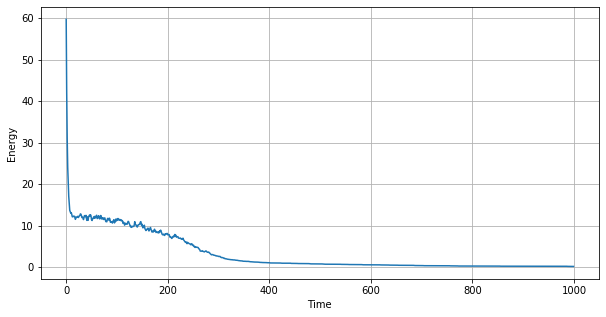

In [0]:
import numpy as np

# run algo 100 times and draw the avarage convergence figure
curs = list()
for n in range(100):
  n, cur = solveQueensProblem(10, maxSteps=1000);
  curs.append(cur);

x = np.matrix(curs)
meanSolution = np.matrix(curs).mean(0)

plt.figure(1, figsize=(10, 5))
plt.plot(meanSolution.tolist()[0])
plt.grid(True)
plt.xlabel("Time")
plt.ylabel("Energy")
plt.savefig("/home/sa-example.svg")
plt.show()

Measure the Time depends on N avaraged over 10 runs for each N.

In [0]:
maxDimension = 40;
maxRunsForN = 200;
startRun = 4;

avarageStepsForN = []

for N in range(startRun, maxDimension + 1):
  print(N, end=" ")
  stepsOnCurrentRun = []
  for run in range(maxRunsForN):
    requiredSteps, curs = solveQueensProblem(N)
    stepsOnCurrentRun.append(requiredSteps)
  avarageStepsForN.append(sum(stepsOnCurrentRun) / maxRunsForN)

4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 

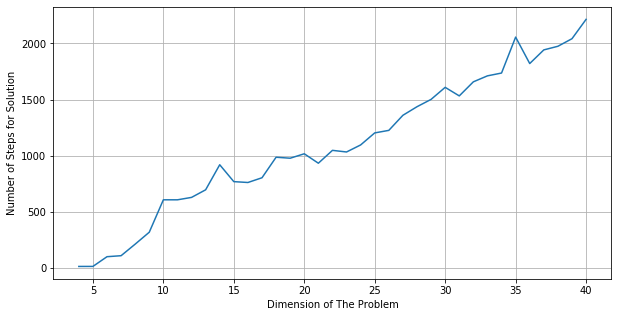

In [0]:
plt.figure(1, figsize=(10, 5))
plt.plot(range(startRun, maxDimension + 1), avarageStepsForN)
plt.grid(True)
plt.xlabel("Dimension of The Problem")
plt.ylabel("Number of Steps for Solution")
plt.savefig("/home/sa-runs.svg")
plt.show()